# segmentor2.py

## training

In [1]:
import leopardgecko.segmentor2 as lgs2
import numpy as np

In [2]:
import logging
#logging.basicConfig(level=logging.INFO)
logging.basicConfig(level=logging.INFO,
                    format="%(asctime)s — %(name)s — %(levelname)s — %(funcName)s:%(lineno)d — %(message)s",
        )
import tifffile

In [3]:
data_labels_fn=[
    ("./test_data/TS_0005_crop.tif", "./test_data/TS_0005_ribos_membr_crop.tif"),
]

traindatas=[]
trainlabels=[]

for datafn0, labelfn0 in data_labels_fn:
     #Make sure data and labels are curated in the correct data format
    traindatas.append(tifffile.imread(datafn0))
    trainlabels.append(tifffile.imread(labelfn0)) #In this case labels are already in uint8

In [4]:
print(lgs2.nn1_train_epochs)
print(lgs2.nn2_train_epochs)

10
10


In [5]:
#lgs2.quick_new_and_train_one_unet_model_per_axis(traindatas, trainlabels)

lgs2.quick_new_and_train_2unets_z_xy_models(traindatas, trainlabels)

2024-07-01 09:36:23,234 — root — INFO — quick_new_and_train_2unets_z_xy_models:1605 — quick_new_and_train_one_unet_model_per_axis
2024-07-01 09:36:23,235 — root — INFO — update_nn1_models_from_generators:173 — update_NN1_models_from_generators()
2024-07-01 09:36:23,235 — root — INFO — update_nn1_models_from_generators:178 — 2 NN1 models to be created
2024-07-01 09:36:23,235 — root — INFO — create_nn1_ptmodel_from_class_generator:125 — create_nn1_ptmodel_from_class_generator()
2024-07-01 09:36:24,239 — root — INFO — create_nn1_ptmodel_from_class_generator:125 — create_nn1_ptmodel_from_class_generator()
2024-07-01 09:36:24,998 — root — INFO — update_nn2_model_from_generator:979 — update_NN2_model_from_generator()
2024-07-01 09:36:24,998 — root — INFO — create_nn2_ptmodel_from_class_generator:946 — create_nn2_ptmodel_from_class_generator()
2024-07-01 09:36:24,998 — root — INFO — create_nn2_ptmodel_from_class_generator:954 — hid_layers_num_list: [10, 10]
2024-07-01 09:36:24,998 — root — IN

Save model

In [6]:
import datetime
DATE=str(datetime.date.today())
TIME=f"{datetime.datetime.now().hour:02d}{datetime.datetime.now().minute:02d}"
fname_stem=f"{DATE}_{TIME}"
model_fn = f"{fname_stem}_model.lgsegm2"
model_fn

'2024-07-01_0945_model.lgsegm2'

In [7]:
lgs2.save_lgsegm2_model(model_fn)

## see training progress

In [8]:
lgs2.last_train_nn1_progress

{0: {'test_results': [{'avg_loss': 0.5307001318689205,
    'avg_metric': 0.17306262357377486,
    'test_metrics': [1.0,
     1.4847810481111168e-11,
     0.005071521271020174,
     1.0,
     1.0,
     0.022100601345300674,
     0.3768850862979889,
     1.4974544174095605e-11,
     1.1322463799867677e-11,
     1.7421602355183197e-11,
     0.0024006813764572144,
     1.0,
     0.0003483309119474143,
     2.7754649273292742e-11,
     0.056627191603183746,
     5.515111371062753e-12,
     0.0031115366145968437,
     0.0016949152341112494,
     1.2428535631214821e-11,
     0.00011627908679656684,
     0.006999494042247534,
     5.990893978818912e-12,
     0.01972062513232231,
     0.004551945719867945,
     5.384449830447835e-12,
     4.166666567329003e-09],
    'test_losses': [4.609426014212659e-06,
     0.6716428995132446,
     0.6715599894523621,
     5.0465268941479735e-06,
     7.073084816511255e-06,
     0.667400062084198,
     0.6771213412284851,
     0.6739276647567749,
     0.67683

In [9]:
for k,v in lgs2.last_train_nn1_progress.items():
    print(k,v)

0 {'test_results': [{'avg_loss': 0.5307001318689205, 'avg_metric': 0.17306262357377486, 'test_metrics': [1.0, 1.4847810481111168e-11, 0.005071521271020174, 1.0, 1.0, 0.022100601345300674, 0.3768850862979889, 1.4974544174095605e-11, 1.1322463799867677e-11, 1.7421602355183197e-11, 0.0024006813764572144, 1.0, 0.0003483309119474143, 2.7754649273292742e-11, 0.056627191603183746, 5.515111371062753e-12, 0.0031115366145968437, 0.0016949152341112494, 1.2428535631214821e-11, 0.00011627908679656684, 0.006999494042247534, 5.990893978818912e-12, 0.01972062513232231, 0.004551945719867945, 5.384449830447835e-12, 4.166666567329003e-09], 'test_losses': [4.609426014212659e-06, 0.6716428995132446, 0.6715599894523621, 5.0465268941479735e-06, 7.073084816511255e-06, 0.667400062084198, 0.6771213412284851, 0.6739276647567749, 0.6768333315849304, 0.3407976031303406, 0.678168773651123, 4.76837158203125e-06, 0.6829237937927246, 0.6700453162193298, 0.6381586790084839, 0.6844322681427002, 0.6729466915130615, 0.671

In [10]:
for k,v in lgs2.last_train_nn1_progress.items():
    print(k,v['test_results'])
    print(len(v['test_results']))

0 [{'avg_loss': 0.5307001318689205, 'avg_metric': 0.17306262357377486, 'test_metrics': [1.0, 1.4847810481111168e-11, 0.005071521271020174, 1.0, 1.0, 0.022100601345300674, 0.3768850862979889, 1.4974544174095605e-11, 1.1322463799867677e-11, 1.7421602355183197e-11, 0.0024006813764572144, 1.0, 0.0003483309119474143, 2.7754649273292742e-11, 0.056627191603183746, 5.515111371062753e-12, 0.0031115366145968437, 0.0016949152341112494, 1.2428535631214821e-11, 0.00011627908679656684, 0.006999494042247534, 5.990893978818912e-12, 0.01972062513232231, 0.004551945719867945, 5.384449830447835e-12, 4.166666567329003e-09], 'test_losses': [4.609426014212659e-06, 0.6716428995132446, 0.6715599894523621, 5.0465268941479735e-06, 7.073084816511255e-06, 0.667400062084198, 0.6771213412284851, 0.6739276647567749, 0.6768333315849304, 0.3407976031303406, 0.678168773651123, 4.76837158203125e-06, 0.6829237937927246, 0.6700453162193298, 0.6381586790084839, 0.6844322681427002, 0.6729466915130615, 0.6717430949211121, 0.

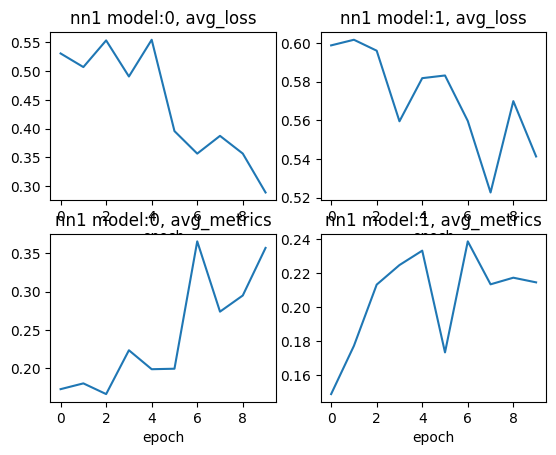

In [11]:
import matplotlib.pyplot as plt

nmodels = len(lgs2.last_train_nn1_progress.keys())

fig, axs= plt.subplots(2,2)
for k,v in lgs2.last_train_nn1_progress.items():

    avg_loss = [ t['avg_loss'] for t in v['test_results']]
    avg_metrics = [ t['avg_metric'] for t in v['test_results']]
    axs[0,k].plot( avg_loss)
    axs[0,k].set_title(f"nn1 model:{k}, avg_loss")
    axs[0,k].set_xlabel("epoch")
    axs[1,k].plot(avg_metrics)
    axs[1,k].set_title(f"nn1 model:{k}, avg_metrics")
    axs[1,k].set_xlabel("epoch")

In [12]:
lgs2.last_train_nn2_progress

{'test_results': [{'avg_loss': 0.2625220101326704,
   'avg_metric': 0.9434661865234375,
   'test_metrics': [0.9453125,
    0.9375,
    0.944091796875,
    0.941650390625,
    0.947021484375,
    0.946044921875,
    0.941162109375,
    0.941650390625,
    0.938232421875,
    0.945556640625,
    0.945068359375,
    0.941650390625,
    0.94140625,
    0.943603515625,
    0.9462890625,
    0.94921875],
   'test_losses': [0.25746119022369385,
    0.2873854637145996,
    0.26345542073249817,
    0.27236685156822205,
    0.24321073293685913,
    0.25364530086517334,
    0.274213582277298,
    0.2755071520805359,
    0.28052371740341187,
    0.2526598572731018,
    0.25673946738243103,
    0.2642931044101715,
    0.26642662286758423,
    0.26657816767692566,
    0.24818956851959229,
    0.23769596219062805]},
  {'avg_loss': 0.19567074067890644,
   'avg_metric': 0.9477996826171875,
   'test_metrics': [0.9521484375,
    0.949462890625,
    0.949462890625,
    0.943359375,
    0.945068359375,
   

Text(0.5, 0, 'epoch')

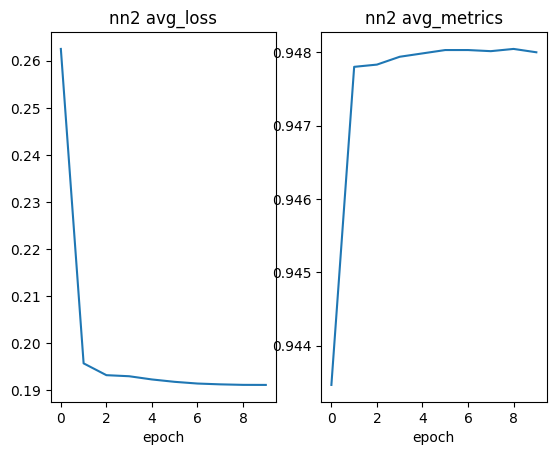

In [13]:
import matplotlib.pyplot as plt

nmodels = len(lgs2.last_train_nn1_progress.keys())
fig, axs= plt.subplots(1,2)

v=lgs2.last_train_nn2_progress

avg_loss = [ t['avg_loss'] for t in v['test_results']]
avg_metrics = [ t['avg_metric'] for t in v['test_results']]
axs[0].plot( avg_loss)
axs[0].set_title(f"nn2 avg_loss")
axs[0].set_xlabel("epoch")
axs[1].plot(avg_metrics)
axs[1].set_title(f"nn2 avg_metrics")
axs[1].set_xlabel("epoch")

In [14]:
assert 1==0

AssertionError: 

# Load model and predict

Recommended restart kernel

## setup

In [15]:
import numpy as np
import leopardgecko.segmentor2 as lgs2
import tifffile
import napari

In [16]:
#lgs2.load_lgsegm2_model("2024-06-19_0931_model.lgsegm2")
lgs2.load_lgsegm2_model("2024-07-01_0945_model.lgsegm2")

2024-07-01 09:46:08,008 — root — INFO — load_lgsegm2_model:1538 — load_lgsegm2_model(), with file 2024-07-01_0945_model.lgsegm2
2024-07-01 09:46:08,619 — root — INFO — load_lgsegm2_model:1548 — Loading NN1 models
2024-07-01 09:46:08,619 — root — INFO — update_nn1_models_from_generators:173 — update_NN1_models_from_generators()
2024-07-01 09:46:08,619 — root — INFO — update_nn1_models_from_generators:178 — 2 NN1 models to be created
2024-07-01 09:46:08,619 — root — INFO — create_nn1_ptmodel_from_class_generator:125 — create_nn1_ptmodel_from_class_generator()
2024-07-01 09:46:09,140 — root — INFO — create_nn1_ptmodel_from_class_generator:125 — create_nn1_ptmodel_from_class_generator()
2024-07-01 09:46:09,587 — root — INFO — load_lgsegm2_model:1564 — Loading NN2 model
2024-07-01 09:46:09,587 — root — INFO — update_nn2_model_from_generator:979 — update_NN2_model_from_generator()
2024-07-01 09:46:09,602 — root — INFO — create_nn2_ptmodel_from_class_generator:946 — create_nn2_ptmodel_from_cl

In [17]:
val_data = tifffile.imread("test_data\TS_0005_crop_val.tif")
val_labels_gnd = tifffile.imread("test_data\TS_0005_ribos_membr_crop_val.tif")

val_data_l = [val_data]

In [18]:
#Normalise
datavols_norm_list0 = lgs2.normalise_volumes(val_data_l)

2024-07-01 09:46:10,941 — root — INFO — normalise_volumes:1361 — normalise_volumes()
2024-07-01 09:46:10,942 — root — INFO — get_func_from_data_vol_norm_process_str:1348 — get_func_from_data_vol_norm_process_str()
2024-07-01 09:46:10,944 — root — INFO — get_func_from_data_vol_norm_process_str:1349 — data_vol_norm_process_str:mean_stdev_3
2024-07-01 09:46:10,944 — root — INFO — normalise_volumes:1368 — Normalising data.
2024-07-01 09:46:10,946 — root — INFO — normalise_voldata_to_stdev_3:196 — normalise_voldata_to_stdev_3()


In [19]:
# NV=napari.Viewer()
# NV.add_image(val_data)
# NV.add_image(datavols_norm_list0[0], name="normalized")
# NV.add_labels(val_labels_gnd, name="ground truth lbl")

OK

In [20]:
slice = datavols_norm_list0[0][128,:,:] #in case it is needed, and example slice

In [21]:
lgs2.torch_device_str_nn2 = "cuda:0"

Working through function by function in segmentor.py to find what is going wrong

## Check single slice prediction

In [ ]:
lgs2.NN1_models[0]

In [ ]:
lgs2.nn1_axes_to_models_indices

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(slice)

In [ ]:
model = lgs2.NN1_models[0]
model.eval()

In [ ]:
import torch
import torch.nn
x = torch.unsqueeze( torch.unsqueeze( torch.from_numpy(slice), dim=0) , dim=0).float().to("cuda:0")
X=model(x)
SM_func = torch.nn.Softmax(dim=1)
pred_probs_slice = SM_func(X)

In [ ]:
pred_probs_slice.shape

In [ ]:
plt.imshow(pred_probs_slice.detach().cpu().numpy()[0,0,:,:])

OK

## Check nn1_predict_slices_along_axis_1

In [ ]:
probs0, lbls0 = lgs2.predict_nn1_slices_along_axis_1(datavols_norm_list0[0], axis=0)

In [ ]:
NV=napari.Viewer()
NV.add_image(val_data)
NV.add_image(probs0, name="pred probs")

OK

## Check NN1_predict

In [ ]:
import tempfile
from pathlib import Path
tempdir_pred= tempfile.TemporaryDirectory()
path_out_results = Path(tempdir_pred.name)
path_out_results

In [ ]:
res_pd = lgs2.predict_nn1(datavols_norm_list0, path_out_results)

Check results in temporary folder

In [ ]:
# cleanup
del(tempdir_pred)

## Check full `predict()`

In [22]:
pred_res = lgs2.predict(val_data_l)

2024-07-01 09:46:24,032 — root — INFO — predict_from_data_list:1427 — predict_from_data_list()
2024-07-01 09:46:24,034 — root — INFO — normalise_volumes:1361 — normalise_volumes()
2024-07-01 09:46:24,035 — root — INFO — get_func_from_data_vol_norm_process_str:1348 — get_func_from_data_vol_norm_process_str()
2024-07-01 09:46:24,035 — root — INFO — get_func_from_data_vol_norm_process_str:1349 — data_vol_norm_process_str:mean_stdev_3
2024-07-01 09:46:24,036 — root — INFO — normalise_volumes:1368 — Normalising data.
2024-07-01 09:46:24,036 — root — INFO — normalise_voldata_to_stdev_3:196 — normalise_voldata_to_stdev_3()
2024-07-01 09:46:24,445 — root — INFO — predict_from_data_list:1440 — tempdir_pred_path:C:\Users\LUIS-W~1\AppData\Local\Temp\tmpqw4lfey7
2024-07-01 09:46:24,445 — root — INFO — predict_nn1:780 — predict_NN1()
2024-07-01 09:46:24,445 — root — INFO — predict_nn1:791 — Data to predict iset:0
2024-07-01 09:46:24,445 — root — INFO — predict_nn1:797 — Volume to be rotated by 0 de

In [23]:
import napari
NV=napari.Viewer()
NV.add_image(val_data)
NV.add_labels(val_labels_gnd, name="lbls gnd")
NV.add_labels(pred_res[0], name="pred lbls")

2024-07-01 09:47:27,363 — vispy — WARNING — message_handler:235 — DirectWrite: CreateFontFaceFromHDC() failed (Indicates an error in an input file such as a font file.) for QFontDef(Family="", pointsize=12, pixelsize=16, styleHint=5, weight=50, stretch=100, hintingPreference=0) LOGFONT("MS Sans Serif", lfWidth=0, lfHeight=-16) dpi=192


Assistant skips harvesting pyclesperanto as it's not installed.


2024-07-01 09:47:30,730 — vispy — WARNING — message_handler:235 — QWindowsWindow::setGeometry: Unable to set geometry 3840x2018+800+372 (frame: 3866x2089+787+314) on QWidgetWindow/"_QtMainWindowClassWindow" on "\\.\DISPLAY1". Resulting geometry: 2884x1759+800+372 (frame: 2910x1830+787+314) margins: 13, 58, 13, 13 minimum size: 385x496 MINMAXINFO maxSize=0,0 maxpos=0,0 mintrack=796,1063 maxtrack=0,0)


<Labels layer 'pred lbls' at 0x20845ccb290>

OK